In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [10]:
X_train = np.array([[2,3], [-4,0], [1,1], [1,1], [-2,2], [2,7]])
y_train = np.array([1, 0, 0, 1, 0, 1])

X_test = np.array([[1,2], [3,4]])
y_test = np.array([0, 1])

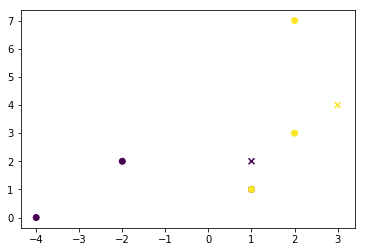

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x') # marker para distinguir os novos

In [4]:
model = tree.DecisionTreeClassifier(criterion='gini',random_state=42)

In [5]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [6]:
y_pred = model.predict(X_test)
y_pred

array([0, 1])

In [7]:
model.score(X_test, y_test)

1.0

In [8]:
model.feature_importances_ # 75% de um bom resultado depende da primeira feature

array([0.75, 0.25])

In [12]:
tree.plot_tree(model) # precisa atualizar a versao do scikit-learn

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [11]:
df = pd.DataFrame(X_train)
df['label'] = y_train
df

,0,1,label
0,2,3,1
1,-4,0,0
2,1,1,0
3,1,1,1
4,-2,2,0
5,2,7,1


In [14]:
# ordenando os valores
df_sort = df.sort_values(by=0)
df_sort

,0,1,label
1,-4,0,0
4,-2,2,0
2,1,1,0
3,1,1,1
0,2,3,1
5,2,7,1


In [22]:
values, counts = np.unique(df_sort['label'], return_counts=True)
values, counts

(array([0, 1]), array([3, 3], dtype=int64))

In [23]:
def gini(labels):
    values, counts = np.unique(labels, return_counts=True)
    tot = np.sum(counts)
    sum_sq = 0
    for i in counts:
        sum_sq += (i/tot)**2
    return 1 - sum_sq

In [32]:
gini(df_sort['label'][:4])

0.375

In [ ]:
plt.figure(dpi=100)
tree.plot_tree(model, filled=True);